<a href="https://colab.research.google.com/github/aby73/digital-image-processing/blob/main/dipcodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

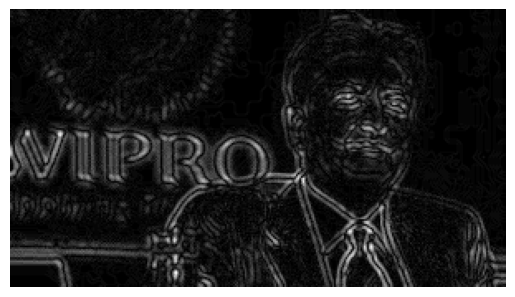

In [ ]:
import cv2
import matplotlib.pyplot as plt

def apply_LoG_filter(image, kernel_size, sigma):
    # Apply Gaussian smoothing
    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

    # Apply Laplacian filter
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    # Scale Laplacian response to 0-255 and convert to uint8
    scaled_laplacian = cv2.convertScaleAbs(laplacian)

    return scaled_laplacian

# Read the image
image = cv2.imread('/content/download.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not loaded")
    exit(1) Yo

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply LoG filter with kernel size 5 and sigma 1.5
result = apply_LoG_filter(gray, 5, 1.5)

# Display the result using matplotlib
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

LAPLACE CODE

CANNY EDGE DETECTION

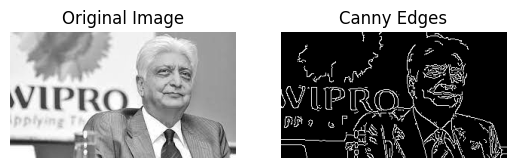

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("premji.jpg", 0)  # Read the image in grayscale

# Apply Canny edge detection
edges = cv2.Canny(image, 100, 200)  # Adjust the threshold values as needed

# Display the original image and the detected edges
plt.subplot(121),plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(122),plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")
plt.show()


DIFFERENCE OF GAUSSIAN

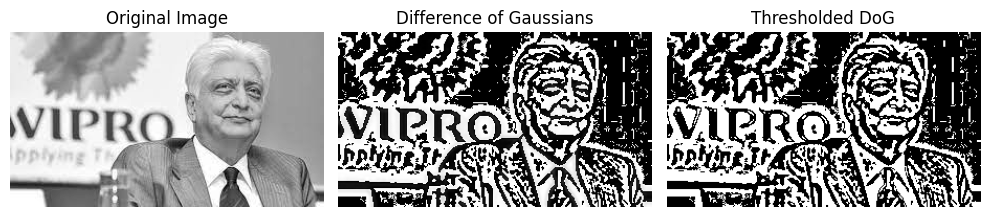

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("premji.jpg", cv2.IMREAD_GRAYSCALE)

# Define the standard deviations for the Gaussian blurring
sigma1 = 1.0
sigma2 = 2.0

# Apply Gaussian blurring
blur1 = cv2.GaussianBlur(image, (0, 0), sigma1)
blur2 = cv2.GaussianBlur(image, (0, 0), sigma2)

# Compute the Difference of Gaussians
dog = blur2 - blur1

# Thresholding
threshold = 30
_, thresholded = cv2.threshold(dog, threshold, 255, cv2.THRESH_BINARY)

# Display the original image and the DoG result
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(132)
plt.imshow(dog, cmap="gray")
plt.title("Difference of Gaussians")
plt.axis("off")

plt.subplot(133)
plt.imshow(thresholded, cmap="gray")
plt.title("Thresholded DoG")
plt.axis("off")

plt.tight_layout()
plt.show()


SKELETON

Skeleton and Image Number 1


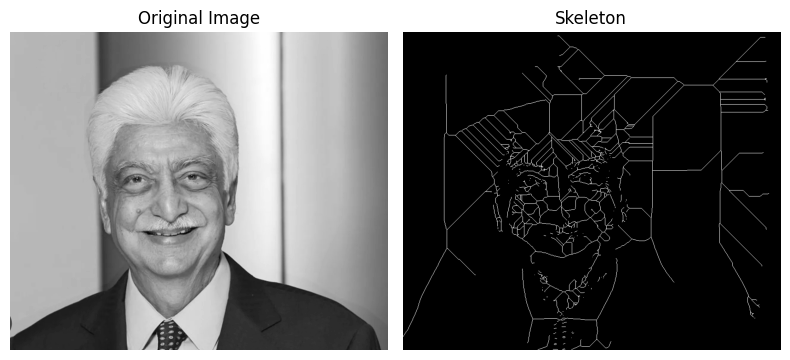

Skeleton and Image Number 2


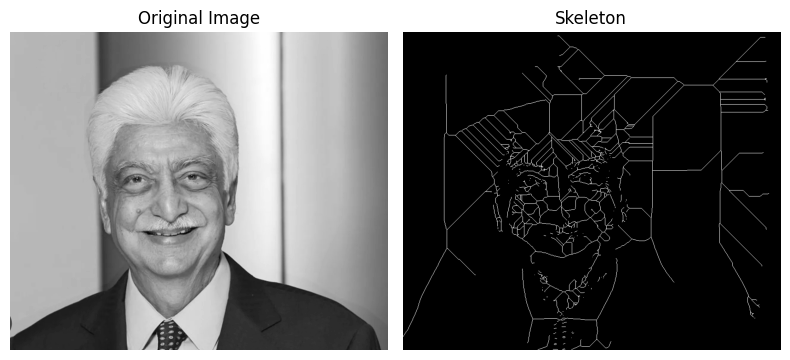

Skeleton and Image Number 3


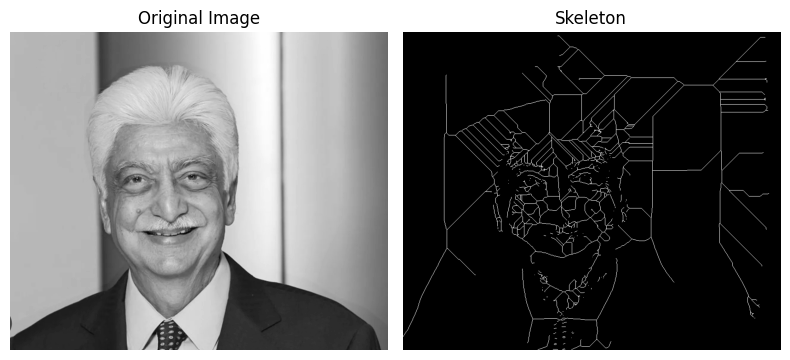

Skeleton and Image Number 4


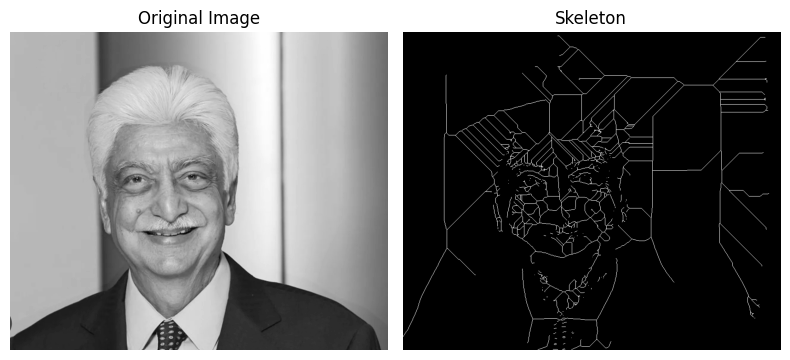

Skeleton and Image Number 5


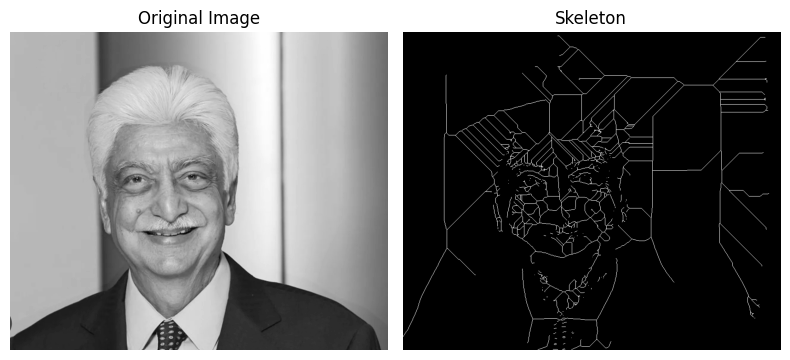

Skeleton and Image Number 6


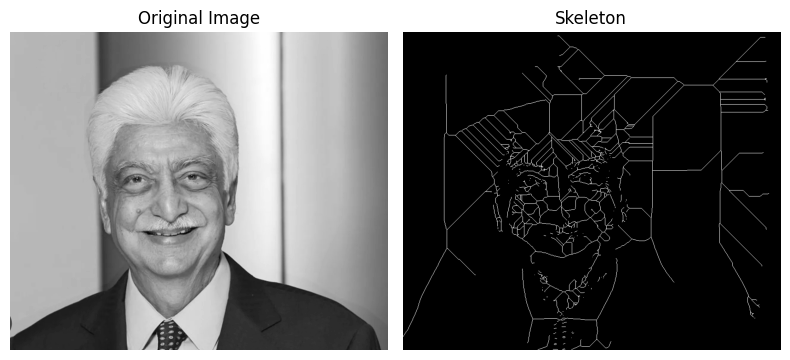

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, morphology

# Load the image
for i in range(1,7):
  j=str(i)
  print("Skeleton and Image Number "+j)
  image_path = "azim premji.png"
  image = io.imread(image_path, as_gray=True)

# Threshold the image (convert it to binary)
  threshold = 0.5  # Adjust the threshold value as needed
  binary_image = image > threshold

# Obtain the skeleton of the binary image
  skeleton = morphology.skeletonize(binary_image)

# Display the original image and its skeleton side by side
  fig, axes = plt.subplots(1, 2, figsize=(8, 4))
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title("Original Image")
  axes[0].axis('off')
  axes[1].imshow(skeleton, cmap='gray')
  axes[1].set_title("Skeleton")
  axes[1].axis('off')

# Show the plots
  plt.tight_layout()
  plt.show()

ROBOTS OPERATOR

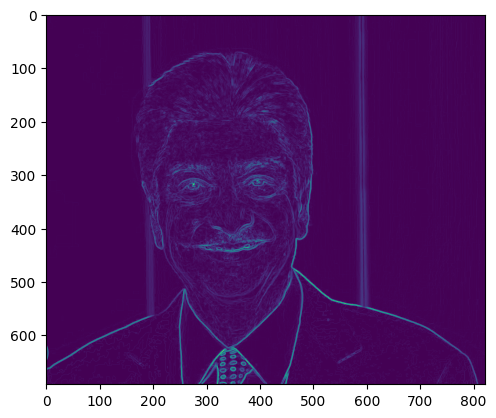

In [ ]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt


roberts_cross_v = np.array( [[1, 0 ],
                            [0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
                            [ -1, 0 ]] )

img = cv2.imread("/content/azim premji.png",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2.imwrite("premji.jpg",edged_img)
plt.imshow(edged_img)

CORNER DETECTION

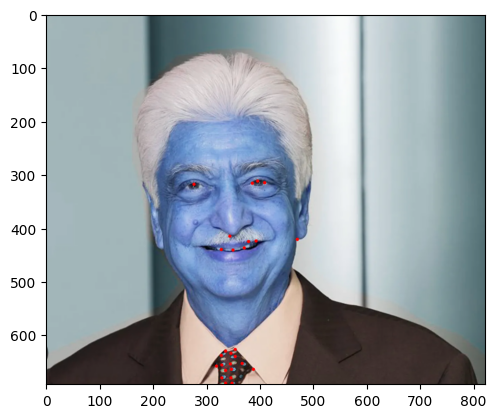

(<matplotlib.image.AxesImage at 0x7ff5d296b040>, None)

In [ ]:
# import the required library
import numpy as np
import cv2
from matplotlib import pyplot as plt


# read the image
img = cv2.imread('/content/azim premji.png')
plt.imshow(img)
# convert image to gray scale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect corners with the goodFeaturesToTrack function.
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10)
corners = np.int0(corners)

# we iterate through each corner,
# making a circle at each point that we think is a corner.
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

plt.imshow(img), plt.show()

HARRIS METHOD OF CORNER DETECTION

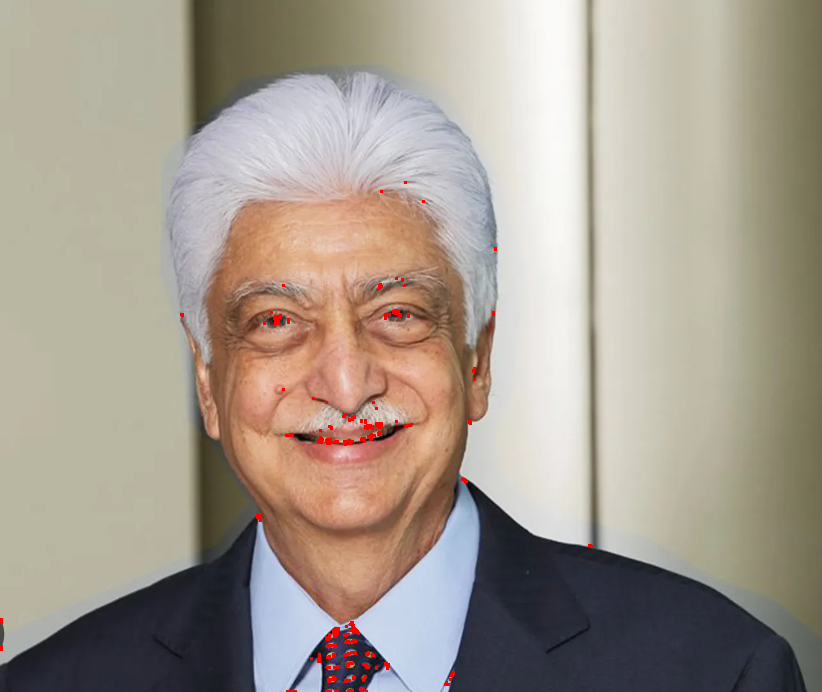

In [ ]:
# Python program to illustrate
# corner detection with
# Harris Corner Detection Method

# organizing imports
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# path to input image specified and
# image is loaded with imread command
image = cv2.imread('/content/azim premji.png')

# convert the input image into
# grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(operatedImage)

# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)

# Results are marked through the dilated corners
dest = cv2.dilate(dest, None)

# Reverting back to the original image,
# with optimal threshold value
image[dest > 0.01 * dest.max()]=[0, 0, 255]

# the window showing output image with corners
cv2_imshow(image)

# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
	cv2.destroyAllWindows()


SOBEL OPERATOR


Text(0.5, 1.0, 'Sobel-y edge detection')

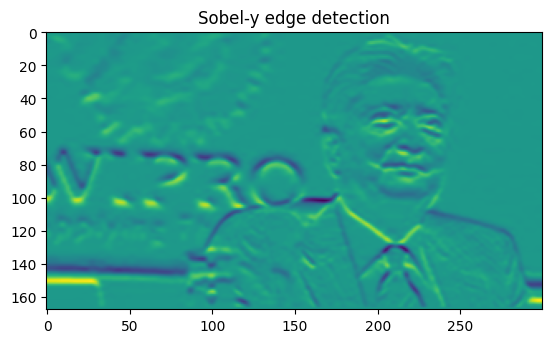

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Read the original image
img = cv2.imread('/content/download.jpg')
# converting because opencv uses BGR as default
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
# converting to gray scale
gray = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with sobel kernels
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

#Plotting images
plt.imshow(sobelx)
plt.title("Sobel-x edge detection")

plt.imshow(sobely)
plt.title("Sobel-y edge detection")

CHAIN CODE

In [ ]:
#This line imports the NumPy library, which provides support for arrays and mathematical operations.
import cv2
import numpy as np

# Function to generate Freeman chain code.This line defines a function named generate_chain_code that takes a boundary as input.
def generate_chain_code(boundary):
    # Define the direction codes.The direction vectors are represented as tuples, and the codes range from 0 to 7.
    direction_codes = {
        (0, 1): 0,
        (-1, 1): 1,
        (-1, 0): 2,
        (-1, -1): 3,
        (0, -1): 4,
        (1, -1): 5,
        (1, 0): 6,
        (1, 1): 7,
    }

    # This line initializes an empty list named chain_code to store the chain code sequence.
    chain_code = []

    # This line starts a loop that iterates over the indices of the boundary list, excluding the last index.
    for i in range(len(boundary) - 1):
        # hese lines calculate the differences in x and y coordinates between the current point and the next point in the boundary list.
        dx = boundary[i + 1][0] - boundary[i][0]
        dy = boundary[i + 1][1] - boundary[i][1]

        # Assign the direction code to the chain code sequence
        try:
            direction = direction_codes[(dx, dy)]
        except KeyError:
            direction = 8  # Default direction code for unrecognized movements
        chain_code.append(direction)

    return chain_code



# Load image
image = cv2.imread('/content/download.jpg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Convert contour to list of points
boundary = largest_contour.reshape(-1, 2).tolist()

# Generate Freeman chain code
chain_code = generate_chain_code(boundary)

# Print the chain code
print(chain_code)

[8, 7, 8, 7, 0, 7, 0, 7, 8, 7, 8, 1, 8, 8, 8, 8, 8, 7, 8, 5, 8, 7, 8, 7, 8, 5, 7, 8, 7, 8, 5, 6, 8, 5, 8, 5, 7, 8, 7, 8, 8, 0, 7, 8, 8, 7, 0, 7, 1, 7, 8, 3, 2, 1, 3, 2, 1, 8, 1, 8, 1, 8, 1, 8, 7, 6, 8, 0, 1, 8, 1, 8, 5, 7, 8, 5, 3, 8, 5, 8, 3, 4, 2, 3, 8, 8, 5, 8, 7, 8, 7, 8, 7, 8, 7, 0, 7, 0, 1, 8, 8, 8, 4, 5, 6, 5, 7, 6, 7, 6, 7, 8, 7, 8, 8, 8, 5, 2, 3, 4, 2, 3, 8, 2, 8, 5, 4, 2, 8, 2, 8, 8, 3, 8, 5, 6, 7, 8, 5, 8, 7, 0, 6, 7, 5, 7, 0, 6, 7, 0, 8, 0, 7, 1, 6, 7, 0, 7, 8, 3, 4, 2, 3, 4, 5, 7, 6, 4, 3, 8, 5, 7, 8, 7, 8, 8, 6, 7, 8, 7, 8, 7, 8, 8, 3, 8, 8, 8, 3, 4, 8, 8, 3, 4, 3, 4, 3, 4, 3, 4, 3, 8, 3, 8, 5, 6, 4, 5, 2, 3, 8, 8, 8, 5, 6, 8, 8, 8, 8, 8, 5, 7, 3, 4, 8, 2, 8, 4, 5, 4, 5, 2, 3, 5, 6, 8, 5, 8, 3, 4, 8, 5, 8, 7, 6, 8, 0, 7, 0, 7, 8, 7, 8, 1, 8, 1, 0, 8, 7, 8, 5, 7, 5, 4, 8, 8, 7, 1, 2, 0, 1, 8, 1, 3, 7, 1, 2, 3, 8, 8, 8, 1, 2, 7, 1, 2, 1, 8, 3, 8, 3, 0, 6, 7, 8, 4, 5, 7, 8, 8, 0, 1, 3, 2, 3, 8, 8, 8, 7, 0, 8, 8, 1, 8, 0, 8, 0, 8, 8, 3, 2, 3, 4, 2, 3, 4, 0, 1, 3, 2, 8, 7, 0, 

TEMPELATE MATCHING

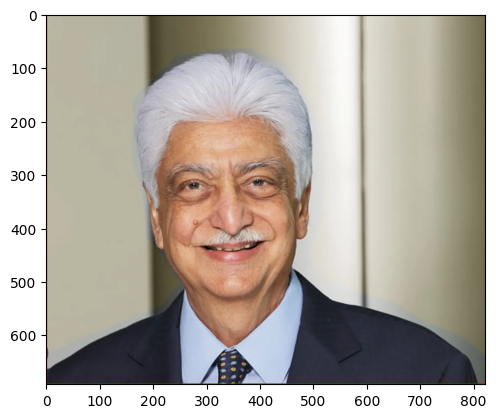

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the RGB image
img_rgb = cv2.imread("/content/azim premji.png")

# Convert the RGB image to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Read the template image
template = cv2.imread("/content/azim premji.png", 0)

# Get the template dimensions
h, w = template.shape[:2]

# Perform template matching
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Set the threshold for matching score
threshold = 0.8

# Find locations where the matching score is above the threshold
loc = np.where(res >= threshold)

# Draw rectangles around the matched locations
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# Display the matched image
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.show()


IMAGE SEGMENTATION

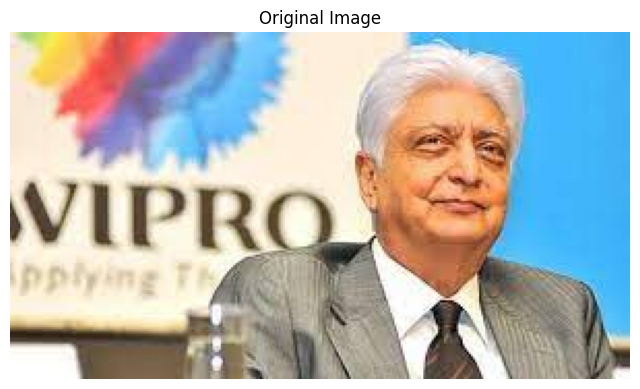

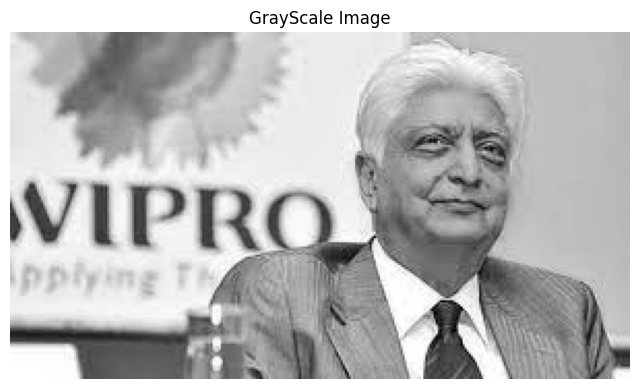

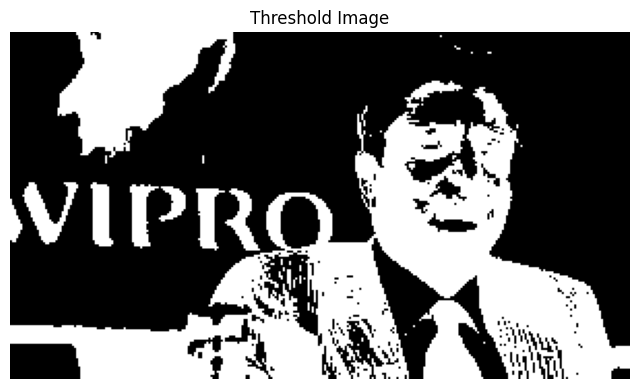

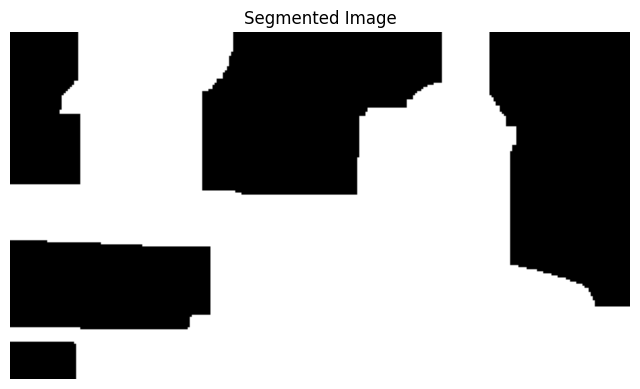

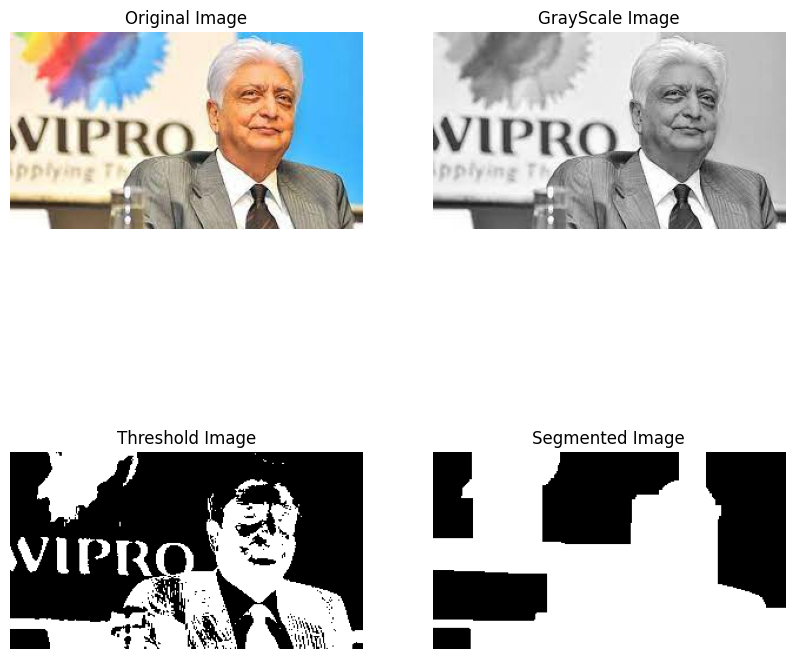

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
#loading original image
img = cv2.imread('/content/download.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.title("Original Image")
plt.show()
#converting to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(gray,cmap="gray")
plt.axis('off')
plt.title("GrayScale Image")
plt.show()
#converting to a binary inverted image
ret, thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)
plt.figure(figsize=(8,8))
plt.imshow(thresh,cmap="gray")
plt.axis('off')
plt.title("Threshold Image")
plt.show()
#segmenting the image
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,kernel, iterations = 15)
bg = cv2.dilate(closing, kernel, iterations = 1)
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
ret, fg = cv2.threshold(dist_transform, 0.02*dist_transform.max(), 255, 0)
plt.figure(figsize=(8,8))
plt.imshow(fg,cmap="gray")
plt.axis('off')
plt.title("Segmented Image")
plt.show()
#final output
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.axis('off')
plt.title("Original Image")
plt.imshow(img,cmap="gray")

plt.subplot(2,2,2)
plt.imshow(gray,cmap="gray")
plt.axis('off')
plt.title("GrayScale Image")

plt.subplot(2,2,3)
plt.imshow(thresh,cmap="gray")
plt.axis('off')
plt.title("Threshold Image")

plt.subplot(2,2,4)
plt.imshow(fg,cmap="gray")
plt.axis('off')
plt.title("Segmented Image")

plt.show()

EDGE RELAXATION

<ipython-input-7-839c5db20206>:3: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


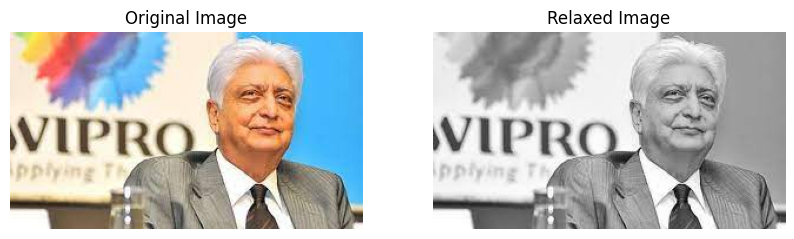

In [ ]:
import numpy as np
import cv2
from scipy.ndimage.filters import convolve
import matplotlib.pyplot as plt

# Define the edge relaxation kernel
kernel = np.array([[0, 1, 0],
                   [1, 4, 1],
                   [0, 1, 0]])

# Define the edge relaxation threshold
threshold = 50


def edge_relaxation(image):
    # Convert image to grayscale if needed
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert image to float for calculations
    image = image.astype(np.float32)

    # Normalize image to range [0, 1]
    image /= 255.0

    # Perform edge relaxation iterations
    while True:
        # Apply the edge relaxation kernel
        smoothed_image = convolve(image, kernel, mode='constant')

        # Find the difference between the original and smoothed images
        diff = np.abs(image - smoothed_image)

        # Update the image with pixels that have a difference above the threshold
        image = np.where(diff > threshold, smoothed_image, image)

        # Check convergence
        if np.max(diff) <= threshold:
            break

    # Convert image back to the range [0, 255]
    image *= 255.0
    image = image.astype(np.uint8)

    return image


# Read the image
image = cv2.imread('/content/download.jpg')

# Apply edge relaxation
relaxed_image = edge_relaxation(image)

# Convert images to RGB for compatibility with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
relaxed_image_rgb = cv2.cvtColor(relaxed_image, cv2.COLOR_BGR2RGB)

# Display the original and relaxed images side by side using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(relaxed_image_rgb)
axes[1].set_title('Relaxed Image')
axes[1].axis('off')
plt.show()


GRAPH THEORITIC ALGORITHM

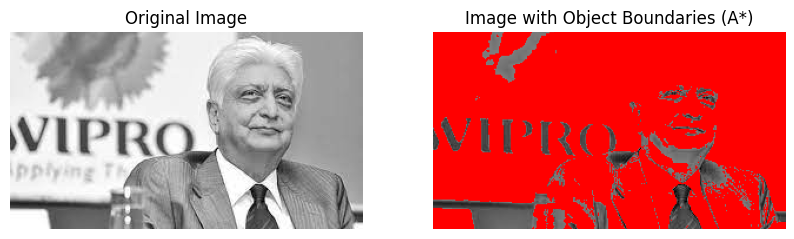

In [ ]:
import numpy as np
import cv2
import heapq
import matplotlib.pyplot as plt

# Define 8-connectivity neighbors
neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]

def heuristic(node, goal):
    # Calculate Euclidean distance as the heuristic
    return np.linalg.norm(np.array(node) - np.array(goal))

def edge_linking(image):
    # Convert image to binary
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Get image dimensions
    height, width = binary_image.shape[:2]

    # Create a visited matrix to keep track of visited pixels
    visited = np.zeros((height, width), dtype=bool)

    # Create a list to store object boundaries
    object_boundaries = []

    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Check if the pixel is an unvisited edge pixel
            if binary_image[y, x] == 255 and not visited[y, x]:
                # Start a new object boundary
                object_boundary = []

                # Perform A* algorithm to find connected edge pixels
                open_list = []
                heapq.heappush(open_list, (0, (y, x)))
                while open_list:
                    _, (cy, cx) = heapq.heappop(open_list)
                    visited[cy, cx] = True
                    object_boundary.append((cx, cy))

                    # Check neighboring pixels
                    for dy, dx in neighbors:
                        ny, nx = cy + dy, cx + dx
                        if 0 <= ny < height and 0 <= nx < width and binary_image[ny, nx] == 255 and not visited[ny, nx]:
                            g = 1  # Cost of moving to a neighboring pixel
                            h = heuristic((ny, nx), (y, x))
                            f = g + h
                            heapq.heappush(open_list, (f, (ny, nx)))
                            visited[ny, nx] = True

                # Add the object boundary to the list
                object_boundaries.append(object_boundary)

    return object_boundaries

# Read the image
image = cv2.imread('/content/download.jpg', cv2.IMREAD_GRAYSCALE)

# Perform edge linking with A* algorithm
object_boundaries = edge_linking(image)

# Create a color image for visualization
image_with_boundaries = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the object boundaries on the image
for object_boundary in object_boundaries:
    for x, y in object_boundary:
        image_with_boundaries[y, x] = (0, 0, 255)  # Draw boundary pixels in red

# Convert images to RGB for compatibility with matplotlib
image_rgb = cv2.cvtColor(image_with_boundaries, cv2.COLOR_BGR2RGB)

# Display the original image and image with object boundaries side by side using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(image_rgb)
axes[1].set_title('Image with Object Boundaries (A*)')
axes[1].axis('off')
plt.show()


HIT & MISS TRANSFORM

ADAPTIVE THRESHOLDING

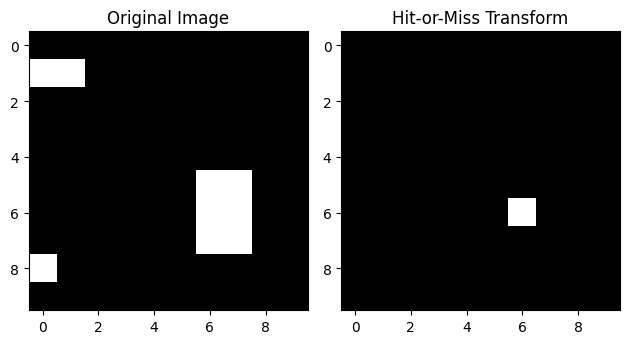

In [ ]:
import numpy as np
from scipy.ndimage import binary_erosion, binary_dilation
from scipy.ndimage import binary_hit_or_miss
from matplotlib import pyplot as plt

# Creating the region
regions = np.zeros((10, 10), bool)
regions[1, :2] = 1
regions[5:8, 6:8] = 1
regions[8, 0] = 1

# Defining the template for hit-or-miss
template = np.array([
    [0, 1, 1],
    [0, 1, 1],
    [0, 1, 1]
], bool)

# Performing hit-or-miss transform
result = binary_hit_or_miss(regions, structure1=template)

# Displaying the original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(regions, cmap='gray')

# Displaying the result of hit-or-miss transform
plt.subplot(1, 2, 2)
plt.title("Hit-or-Miss Transform")
plt.imshow(result, cmap='gray')

plt.tight_layout()
plt.show()


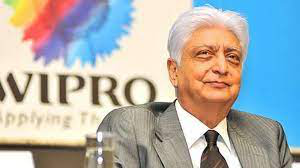

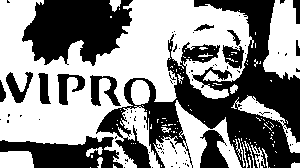

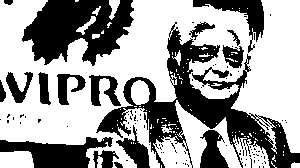

In [ ]:
from PIL import Image
import numpy as np
import cv2

# Open the input image using Pillow
image1 = Image.open('download.jpg')

# Convert the image to grayscale
img = image1.convert('L')

# Convert the Pillow image to a NumPy array
img_array = np.array(img)

# Applying different thresholding techniques
thresh1 = cv2.adaptiveThreshold(img_array, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY, 199, 5)

thresh2 = cv2.adaptiveThreshold(img_array, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 199, 5)

# Convert the NumPy array back to a Pillow image
result1 = Image.fromarray(thresh1)
result2 = Image.fromarray(thresh2)

# Display the images
image1.show(title='original image')
result1.show(title='Adaptive Mean')
result2.show(title='Adaptive Gaussian')

CONVEX HULL


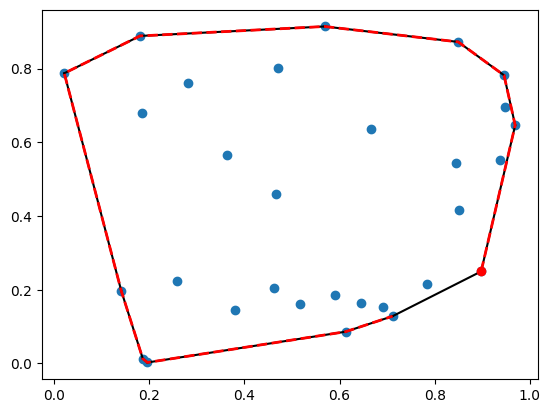

In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
rng = np.random.default_rng()
points = rng.random((30, 2))   # 30 random points in 2-D
hull = ConvexHull(points)
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

OTSU CODE

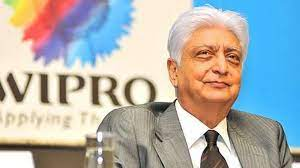

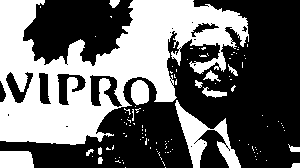

In [ ]:
# Python program to illustrate
# Otsu thresholding type on an image

# organizing imports
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# path to input image is specified and
# image is loaded with imread command
image1 = cv2.imread('/content/download.jpg')
cv2_imshow(image1)

# cv2.cvtColor is applied over the
# image input with applied parameters
# to convert the image in grayscale
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# applying Otsu thresholding
# as an extra flag in binary
# thresholding
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY +
                                            cv2.THRESH_OTSU)

# the window showing output image
# with the corresponding thresholding
# techniques applied to the input image
cv2_imshow( thresh1)

# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

PRINCIPLES OF TRESHOLDING

In [ ]:
import cv2

cap = cv2.VideoCapture('/content/S01E02Bart the Genius.avi')

#tracker = cv2.legacy.TrackerMOSSE_create()


object_detector = cv2.createBackgroundSubtractorMOG2(history=100,varThreshold=40)#higher the threshold less is the false detection
while True:
    ret, frame = cap.read()
    height, width, _ = frame.shape
    #print(height,width)
    newframe = frame
    roi = newframe[170: 300,300:400]

    mask = object_detector.apply(roi) #frame to roi

    _, mask = cv2.threshold(mask,254,255,cv2.THRESH_BINARY)


    #detections = []
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area >100 :
          #cv2.drawContours(roi,[cnt],-1,(0,255,0),2) #here we changed from frame to roi
          x, y, w, h = cv2.boundingRect(cnt)
          cv2.rectangle(roi, (x,y), (x+w,y+h), (255,0,0),2)
          #detections.append([x,y,w,h])

   # print(detections)
   #  cv2.imshow("roi",roi)
    cv2.imshow("Original", frame)
    cv2.imshow("Detected", newframe)
    # cv2.imshow("mask", mask)

    key = cv2.waitKey(30)

    if key == 27:
        break



cap.release()
cap.destroyAllWindows()


PATTERN FIT ALGORITHM

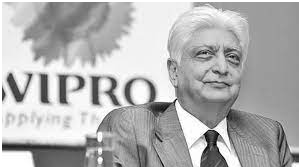

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def pattern_fit(image, template):
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)
    return max_val, max_loc

# Load the main image
image = cv2.imread('/content/download.jpg', cv2.IMREAD_GRAYSCALE)

# Load the template image
template = cv2.imread('/content/download.jpg', cv2.IMREAD_GRAYSCALE)

# Find the pattern in the image
similarity, location = pattern_fit(image, template)

# Draw a rectangle around the matched pattern
h, w = template.shape
top_left = location
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(image, top_left, bottom_right, 255, 2)

# Display the result
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()

GLOBAL THREHSOLDING ALGORITHM

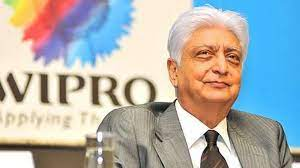

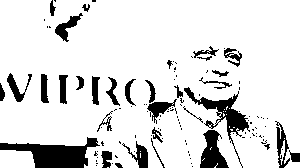

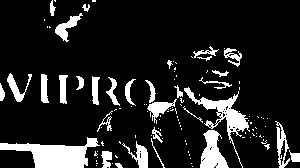

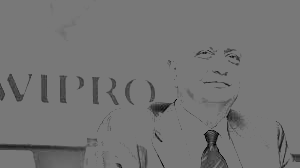

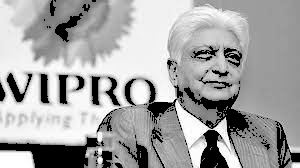

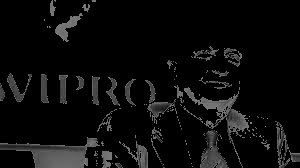

In [ ]:
# Python program to illustrate
# simple thresholding type on an image

# organizing imports
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# path to input image is specified and
# image is loaded with imread command
image1 = cv2.imread('/content/download.jpg')

# cv2.cvtColor is applied over the
# image input with applied parameters
# to convert the image in grayscale
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# applying different thresholding
# techniques on the input image
# all pixels value above 120 will
# be set to 255
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)

# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images
cv2_imshow(image1)
cv2_imshow( thresh1)
cv2_imshow( thresh2)
cv2_imshow( thresh3)
cv2_imshow(thresh4)
cv2_imshow( thresh5)

# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

BACKGROUNG REPRESENTATION

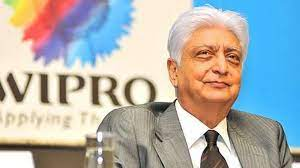

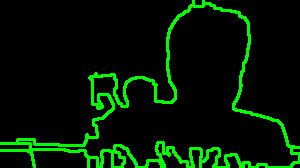

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/download.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Perform morphological closing to connect broken edges
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours of the closed edges
contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Extract the largest contour
largest_contour = contours[0]

# Create a blank image for boundary representation
boundary_image = np.zeros_like(image, dtype=np.uint8)

# Draw the boundary on the image
cv2.drawContours(boundary_image, [largest_contour], 0, (0, 255, 0), thickness=2)

# Display the original image and enhanced boundary representation
cv2_imshow(image)
cv2_imshow(boundary_image)

SKELETANIZATION

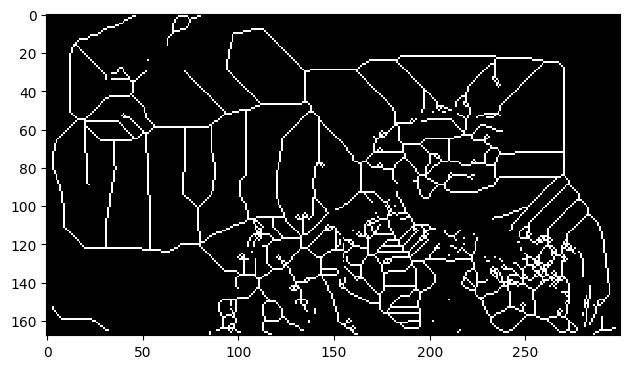

In [ ]:
import numpy as np
from skimage import morphology, io
from google.colab.patches import cv2_imshow

# Read the input image
image = io.imread("/content/download.jpg", as_gray=True)

# Perform binary thresholding
threshold = 0.5
binary_image = image > threshold

# Apply skeletonization
skeleton_image = morphology.skeletonize(binary_image)

# Display the skeleton image
io.imshow(skeleton_image)
io.show()

IMAGE BACKGROUND FORMAT REPRESENTATION

Number of keypoints: 297
Hull: [[[292.9596    149.1292   ]]

 [[287.9191    155.6315   ]]

 [[119.20245   165.21451  ]]

 [[ 36.635273  160.9534   ]]

 [[ 27.181694  155.47095  ]]

 [[  7.4580293 122.011314 ]]

 [[ 10.456454   78.855515 ]]

 [[ 19.100277   32.316525 ]]

 [[ 31.086573   17.342499 ]]

 [[107.12493     8.254856 ]]

 [[201.51587     4.8889055]]

 [[233.90897    13.697622 ]]

 [[240.01614    17.87678  ]]

 [[288.60498   137.66896  ]]]
Number of points in hull: 14


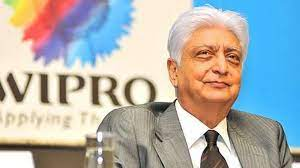

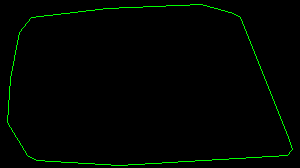

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/download.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the feature detector
detector = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = detector.detectAndCompute(gray, None)

print("Number of keypoints:", len(keypoints))

# Extract keypoint coordinates
keypoint_coords = np.float32([kp.pt for kp in keypoints])

# Compute the convex hull of keypoint coordinates
hull = cv2.convexHull(keypoint_coords)

print("Hull:", hull)
print("Number of points in hull:", len(hull))

# Create a blank image for boundary representation
boundary_image = np.zeros_like(image, dtype=np.uint8)

# Draw lines between keypoints in the hull
for i in range(len(hull) - 1):
    pt1 = tuple(map(int, hull[i][0]))
    pt2 = tuple(map(int, hull[i + 1][0]))
    cv2.line(boundary_image, pt1, pt2, (0, 255, 0), thickness=1)

# Connect the first and last keypoints
pt1 = tuple(map(int, hull[0][0]))
pt2 = tuple(map(int, hull[-1][0]))
cv2.line(boundary_image, pt1, pt2, (0, 255, 0), thickness=1)

# Display the original image and boundary representation
cv2_imshow(image)
cv2_imshow(boundary_image)

POLYGONAL APPROXIMATION

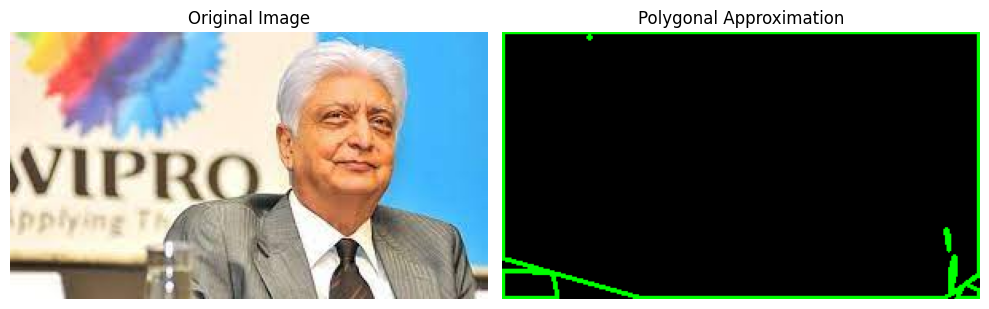

In [ ]:
import cv2
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

def minimum_perimeter_polygon(points):
    if len(points) < 3:
        return None
    hull = ConvexHull(points)
    vertices = hull.vertices
    return [points[vertex] for vertex in vertices]

# Load the image
image = cv2.imread('/content/download.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours and approximate polygons
polygons = []
for contour in contours:
    contour = np.squeeze(contour)
    polygon = minimum_perimeter_polygon(contour)
    if polygon is not None:
        polygons.append(np.array(polygon))

# Create a blank image for drawing the contours
output = np.zeros_like(image)

# Draw the polygons on the image
cv2.drawContours(output, polygons, -1, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Polygonal Approximation')
plt.axis('off')

plt.tight_layout()
plt.show()


HAUGH TRANSFORM

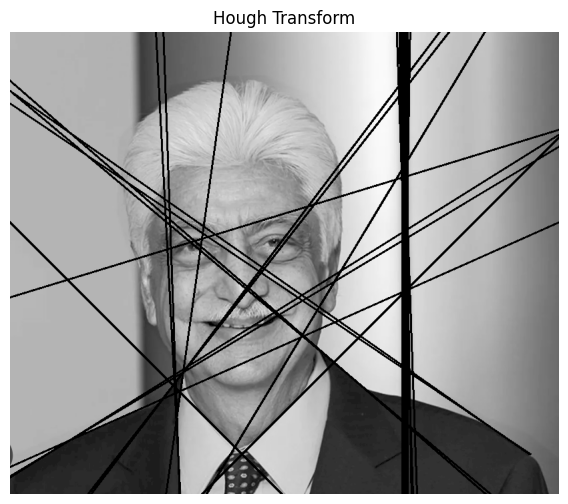

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/azim premji.png', cv2.IMREAD_GRAYSCALE)

# Apply edge detection
edges = cv2.Canny(image, 50, 150, apertureSize=3)

# Perform Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)

# Draw detected lines on the image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform')
plt.axis('off')
plt.show()

BOUNDARY EXTRACTION

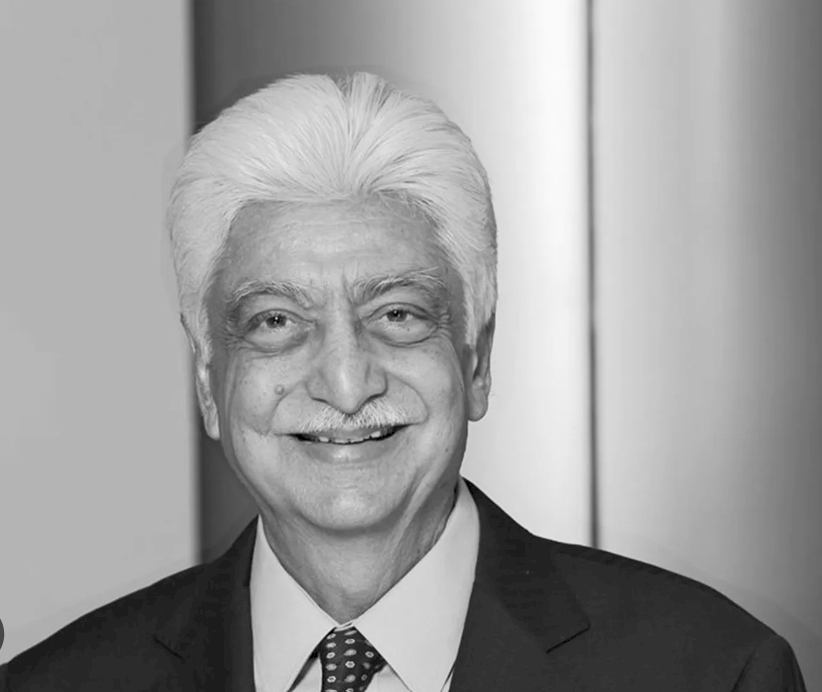

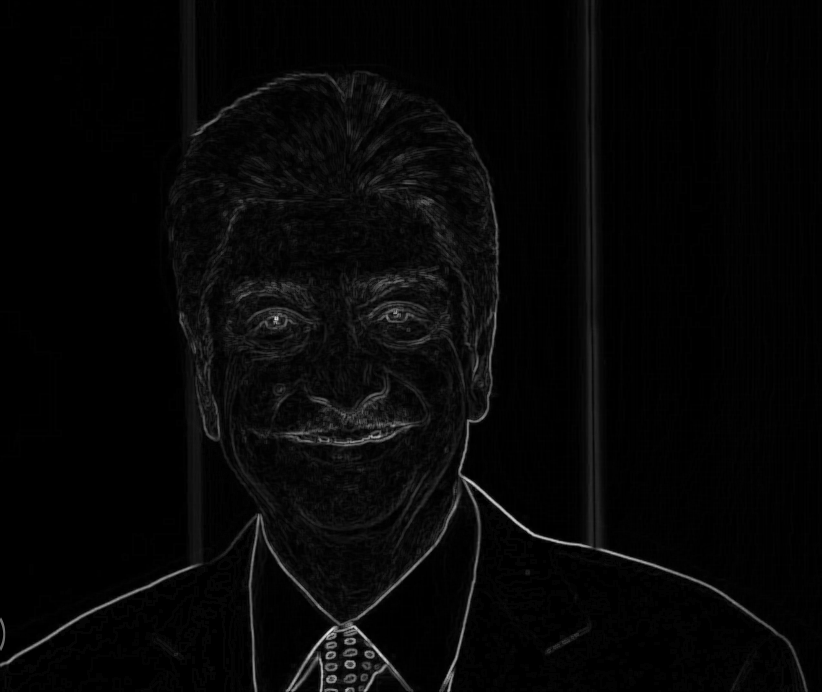

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the binary image
image = cv2.imread('/content/azim premji.png', 0)

# Apply morphological operations for boundary extraction
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(image, kernel, iterations=1)
eroded = cv2.erode(image, kernel, iterations=1)
boundary = dilated - eroded

# Display the result
cv2_imshow(image)
cv2_imshow(boundary)

HOLE FILLING

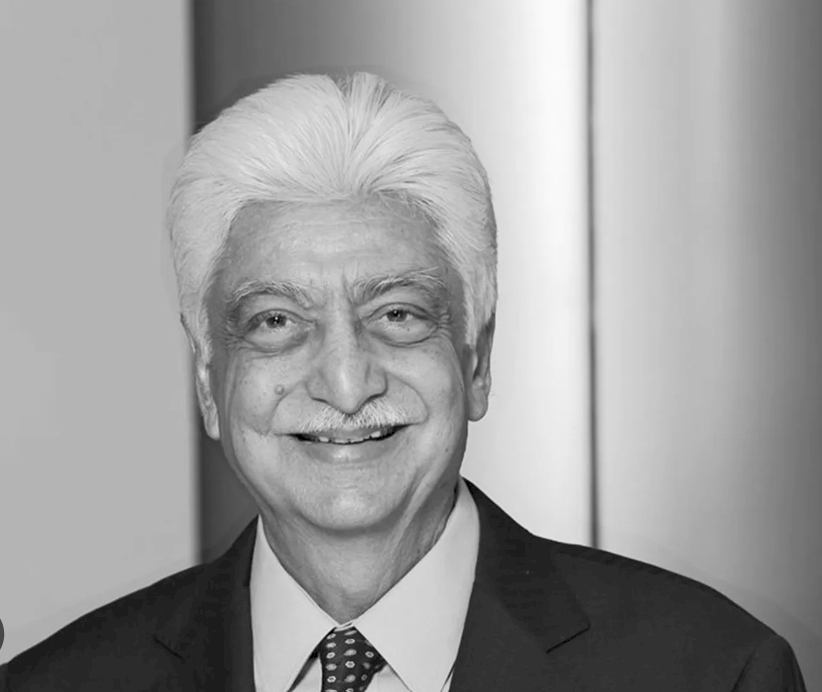

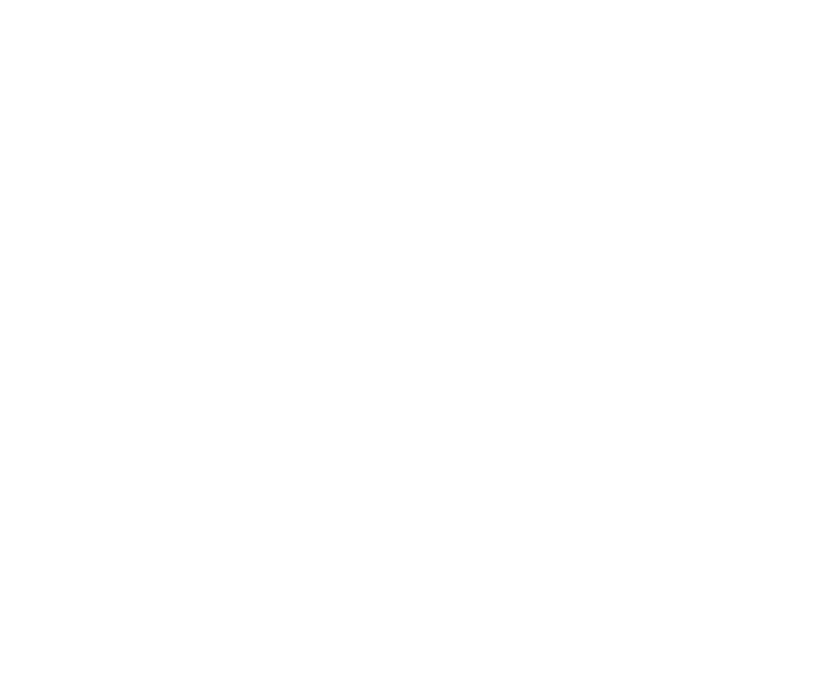

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the binary image
image = cv2.imread('/content/azim premji.png', 0)

# Create a copy of the binary image
filled_image = image.copy()

# Find contours of the inverted image
contours, hierarchy = cv2.findContours(filled_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Fill the contours (holes) with white
cv2.drawContours(filled_image, contours, -1, 255, cv2.FILLED)

# Display the result
cv2_imshow(image)
cv2_imshow(filled_image)

EXTRACTION OF CONNECTED COMPONENTS

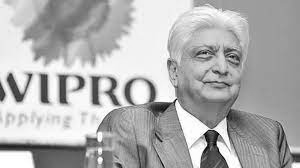

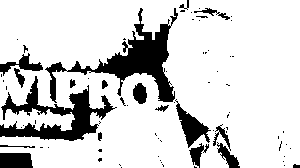

In [ ]:
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

def region_growing(image, seed, threshold):
    height, width = image.shape
    visited = np.zeros_like(image)
    region = np.zeros_like(image)
    queue = [seed]

    while queue:
        current_pixel = queue.pop(0)
        x, y = current_pixel

        if visited[x, y] == 0 and abs(float(image[x, y]) - float(image[seed])) <= threshold:
            visited[x, y] = 1
            region[x, y] = 255

            if x > 0:
                queue.append((x - 1, y))
            if x < height - 1:
                queue.append((x + 1, y))
            if y > 0:
                queue.append((x, y - 1))
            if y < width - 1:
                queue.append((x, y + 1))

    return region

# Load the image
image_path = '/content/download.jpg'
image = Image.open(image_path).convert('L')
image_array = np.array(image, dtype=np.float32)

# Define the seed pixel and threshold
seed_pixel = (50, 50)
threshold = 100

# Apply region growing algorithm
result = region_growing(image_array, seed_pixel, threshold)

# Save the result as an image
result_image = Image.fromarray(result.astype(np.uint8))
result_image.save('/content/result.jpg')

# Display the original and result images
cv2_imshow(np.array(image))
cv2_imshow(result)


HARR TRANSFORM

In [ ]:
import cv2
import numpy as np

def haar_transform_2D(image):
    # Convert image to float32
    image = np.float32(image)

    # Apply Haar transform to rows
    rows, cols = image.shape
    transformed_rows = np.zeros((rows, cols), dtype=np.float32)
    for i in range(rows):
        transformed_rows[i, :] = haar_transform(image[i, :])

    # Apply Haar transform to columns
    transformed_image = np.zeros((rows, cols), dtype=np.float32)
    for j in range(cols):
        transformed_image[:, j] = haar_transform(transformed_rows[:, j])

    return transformed_image

def inverse_haar_transform_2D(transformed_image):
    # Apply inverse Haar transform to columns
    rows, cols = transformed_image.shape
    inverse_transformed_rows = np.zeros((rows, cols), dtype=np.float32)
    for j in range(cols):
        inverse_transformed_rows[:, j] = inverse_haar_transform(transformed_image[:, j])

    # Apply inverse Haar transform to rows
    reconstructed_image = np.zeros((rows, cols), dtype=np.float32)
    for i in range(rows):
        reconstructed_image[i, :] = inverse_haar_transform(inverse_transformed_rows[i, :])

    # Convert image back to uint8
    reconstructed_image = np.uint8(reconstructed_image)

    return reconstructed_image


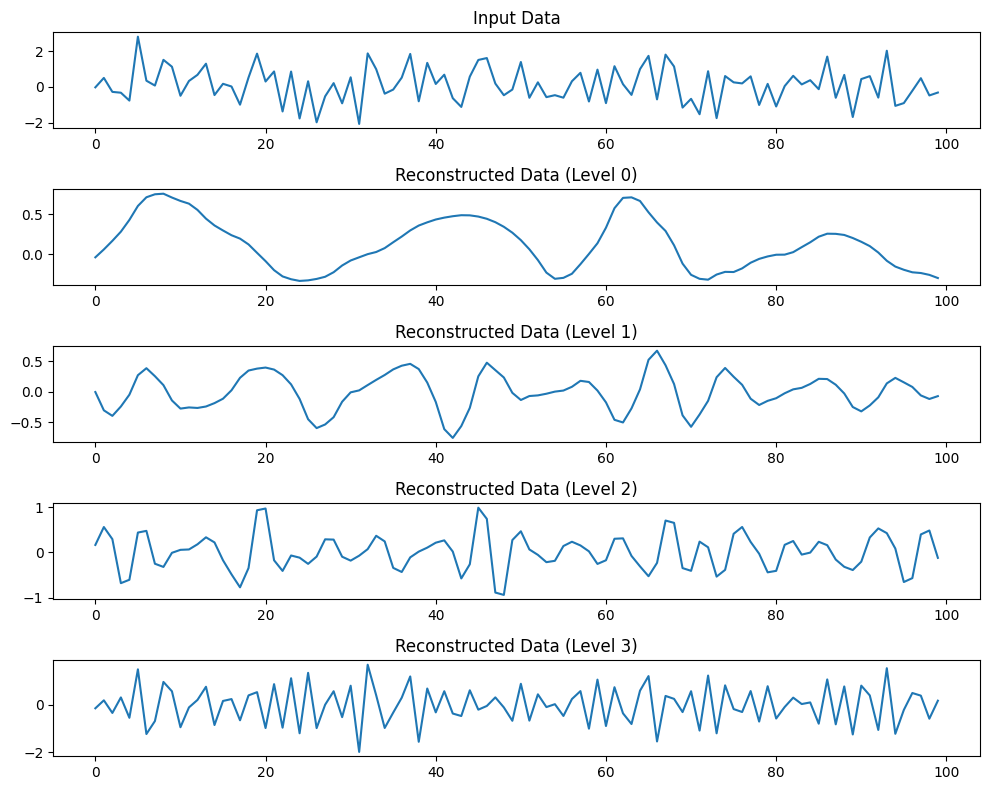

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

def multiresolution_expansion(data, wavelet_name, num_levels):
    # Perform multiresolution expansion using wavelet transform
    coeffs = pywt.wavedec(data, wavelet_name, level=num_levels)

    # Reconstruct the signal at each level of the decomposition
    reconstructed_data = []
    for level in range(num_levels + 1):
        # Get the coefficients for the current level
        level_coeffs = [coeff if idx == level else np.zeros_like(coeff) for idx, coeff in enumerate(coeffs)]

        # Reconstruct the signal using the level coefficients
        reconstructed_level = pywt.waverec(level_coeffs, wavelet_name)
        reconstructed_data.append(reconstructed_level)

    return reconstructed_data

# Example usage
data = np.random.randn(100)  # Random input data
wavelet_name = 'db4'  # Wavelet name (change it to the desired wavelet)
num_levels = 3  # Number of decomposition levels

# Perform multiresolution expansion
reconstructed_data = multiresolution_expansion(data, wavelet_name, num_levels)

# Plot the input data and the reconstructed data at each level
plt.figure(figsize=(10, 8))
plt.subplot(num_levels + 2, 1, 1)
plt.plot(data)
plt.title('Input Data')

for level in range(num_levels + 1):
    plt.subplot(num_levels + 2, 1, level + 2)
    plt.plot(reconstructed_data[level])
    plt.title(f'Reconstructed Data (Level {level})')

plt.tight_layout()
plt.show()